<a href="https://colab.research.google.com/github/Dhanapal-Angamuthu/MachineLearnings/blob/main/LinearRegression/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Ecommerce_customers').getOrCreate()

In [2]:
from pyspark.ml.regression import LinearRegression

In [5]:
from os import terminal_size
dataframe = spark.read.csv('/content/Ecommerce_Customers.csv', inferSchema=True, header=True)
dataframe

DataFrame[Email: string, Address: string, Avg Session Length: double, Time on App: double, Time on Website: double, Length of Membership: double, Yearly Amount Spent: double]

In [6]:
dataframe.show()

+--------------------+--------------------+------------------+-----------+---------------+--------------------+-------------------+
|               Email|             Address|Avg Session Length|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+------------------+-----------+---------------+--------------------+-------------------+
|mstephenson@ferna...|835 Frank TunnelW...|       34.49726773|12.65565115|    39.57766802|         4.082620633|         587.951054|
|   hduke@hotmail.com|4547 Archer Commo...|       31.92627203|11.10946073|    37.26895887|         2.664034182|        392.2049334|
|    pallen@yahoo.com|24645 Valerie Uni...|       33.00091476|11.33027806|    37.11059744|         4.104543202|        487.5475049|
|riverarebecca@gma...|1414 David Throug...|       34.30555663|13.71751367|    36.72128268|         3.120178783|         581.852344|
|mstephens@davidso...|14023 Rodriguez P...|       33.33067252|12.79518855|  

In [7]:
dataframe.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [8]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [9]:
assembleFeature = VectorAssembler(inputCols=['Avg Session Length', 'Time on App', 'Time on Website', 'Length of Membership'], outputCol='IndepFeature')

In [10]:
output = assembleFeature.transform(dataframe)

In [11]:
output.select('IndepFeature').show()

+--------------------+
|        IndepFeature|
+--------------------+
|[34.49726773,12.6...|
|[31.92627203,11.1...|
|[33.00091476,11.3...|
|[34.30555663,13.7...|
|[33.33067252,12.7...|
|[33.87103788,12.0...|
|[32.0215955,11.36...|
|[32.73914294,12.3...|
|[33.9877729,13.38...|
|[31.93654862,11.8...|
|[33.99257277,13.3...|
|[33.87936082,11.5...|
|[29.53242897,10.9...|
|[33.19033404,12.9...|
|[32.38797585,13.1...|
|[30.73772037,12.6...|
|[32.1253869,11.73...|
|[32.33889932,12.0...|
|[32.18781205,14.7...|
|[32.61785606,13.9...|
+--------------------+
only showing top 20 rows



In [12]:
output.columns

['Email',
 'Address',
 'Avg Session Length',
 'Time on App',
 'Time on Website',
 'Length of Membership',
 'Yearly Amount Spent',
 'IndepFeature']

In [14]:
output_data = output.select('IndepFeature', 'Yearly Amount Spent')
output_data.show()

+--------------------+-------------------+
|        IndepFeature|Yearly Amount Spent|
+--------------------+-------------------+
|[34.49726773,12.6...|         587.951054|
|[31.92627203,11.1...|        392.2049334|
|[33.00091476,11.3...|        487.5475049|
|[34.30555663,13.7...|         581.852344|
|[33.33067252,12.7...|         599.406092|
|[33.87103788,12.0...|        637.1024479|
|[32.0215955,11.36...|        521.5721748|
|[32.73914294,12.3...|        549.9041461|
|[33.9877729,13.38...|         570.200409|
|[31.93654862,11.8...|        427.1993849|
|[33.99257277,13.3...|        492.6060127|
|[33.87936082,11.5...|        522.3374046|
|[29.53242897,10.9...|        408.6403511|
|[33.19033404,12.9...|        573.4158673|
|[32.38797585,13.1...|        470.4527333|
|[30.73772037,12.6...|        461.7807422|
|[32.1253869,11.73...|        457.8476959|
|[32.33889932,12.0...|        407.7045475|
|[32.18781205,14.7...|        452.3156755|
|[32.61785606,13.9...|        605.0610388|
+----------

In [15]:
train_data, test_data = output_data.randomSplit([0.7, 0.3])

In [17]:
regressor = LinearRegression(featuresCol='IndepFeature', labelCol='Yearly Amount Spent')
regressor = regressor.fit(train_data)

In [18]:
prediction = regressor.evaluate(test_data)
prediction.predictions.show(50)

+--------------------+-------------------+------------------+
|        IndepFeature|Yearly Amount Spent|        prediction|
+--------------------+-------------------+------------------+
|[29.53242897,10.9...|        408.6403511| 397.1604533782977|
|[30.39318454,11.8...|        319.9288698| 331.6184934818323|
|[30.73772037,12.6...|        461.7807422|451.32298505558924|
|[30.97167564,11.7...|        494.6386098| 487.6709244257245|
|[31.12397435,12.3...|        486.9470538| 508.6514299668911|
|[31.28344748,12.7...|        591.7810894| 569.7920462472109|
|[31.30919264,11.9...|        432.7207178|429.88208193767105|
|[31.36621217,11.1...|        430.5888826| 426.3831964147164|
|[31.57020083,13.3...|        545.9454921| 563.9991291794927|
|[31.65480968,13.0...|        475.2634237| 468.7506890208492|
|[31.6739155,12.32...|        475.7250679|  502.106197763811|
|[31.82934646,11.2...|         385.152338|384.04010228459697|
|[31.8530748,12.14...|        459.2851235|461.65658101238887|
|[31.864

In [22]:
'''
RMSE (Root Mean Squared Error): This measures the average magnitude of the errors. A lower RMSE indicates better performance. Our RMSE is 10.36.
R2 (R-squared): This represents the proportion of the variance in the dependent variable (Yearly Amount Spent) that is predictable from the independent variables. An R2 value
closer to 1 indicates that the model explains a large portion of the variance. Our R2 is 0.981.
These metrics indicate that the model is performing quite well in predicting the Yearly Amount Spent based on the features provided.
'''
print("RMSE: ", prediction.rootMeanSquaredError)
print("R2: ", prediction.r2)

RMSE:  10.362690232022965
R2:  0.981358122696548


In [23]:
'''
Mean Absolute Error (MAE). MAE measures the average magnitude of the errors without considering their direction.

We have now calculated the Mean Absolute Error (MAE), which is another metric to evaluate the performance of the regression model.
An MAE of 8.40 means that, on average, our predictions are off by about $8.40 from the actual yearly amount spent.
'''
from pyspark.ml.evaluation import RegressionEvaluator

# Calculate Mean Absolute Error (MAE)
evaluator = RegressionEvaluator(labelCol="Yearly Amount Spent", predictionCol="prediction", metricName="mae")
mae = evaluator.evaluate(prediction.predictions)

print("MAE: ", mae)

MAE:  8.39890893611379


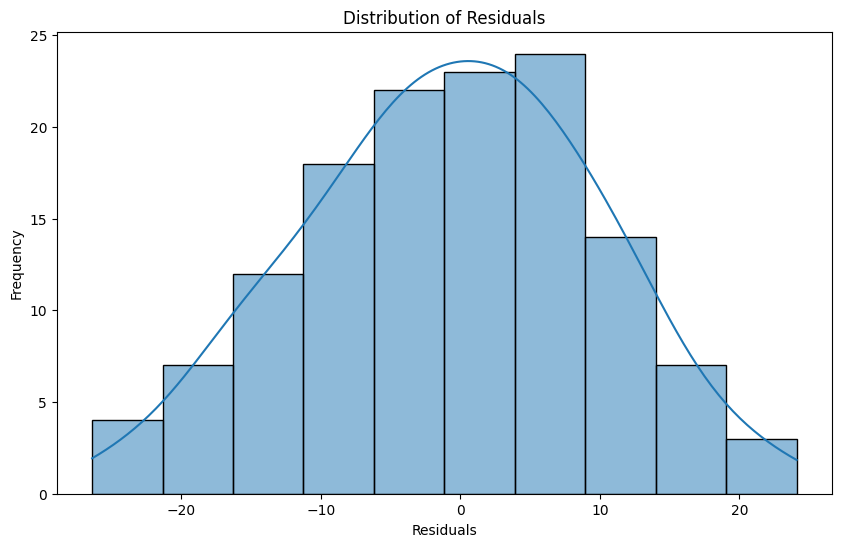

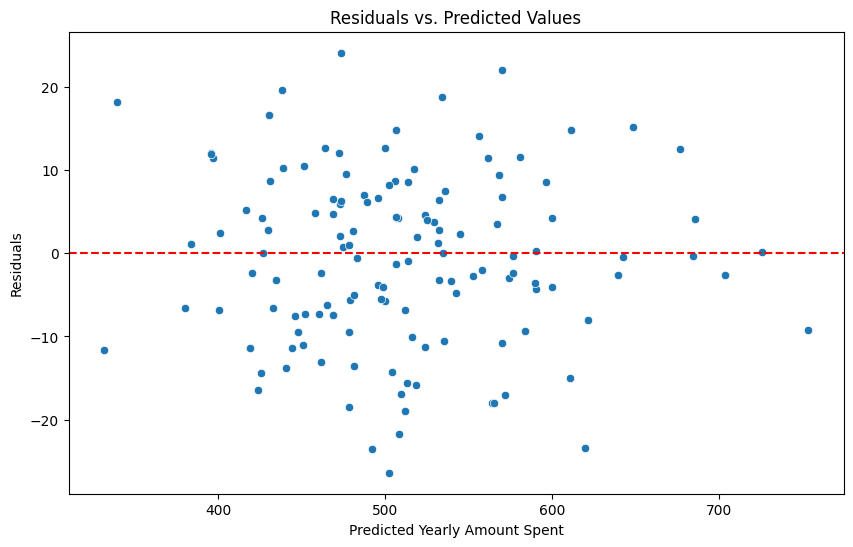

In [24]:
'''
We've now calculated and plotted the residuals.

The histogram of residuals shows the distribution of the errors. Ideally, the residuals should be normally distributed around zero.
The scatterplot of residuals vs. predicted values helps to check for patterns in the errors. Ideally, the residuals should be randomly
scattered around the horizontal line at zero, with no discernible pattern.
'''
# Calculate residuals
predictions_pd['residuals'] = predictions_pd['Yearly Amount Spent'] - predictions_pd['prediction']

# Plotting the residuals
plt.figure(figsize=(10, 6))
sns.histplot(predictions_pd['residuals'], kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='prediction', y='residuals', data=predictions_pd)
plt.xlabel("Predicted Yearly Amount Spent")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

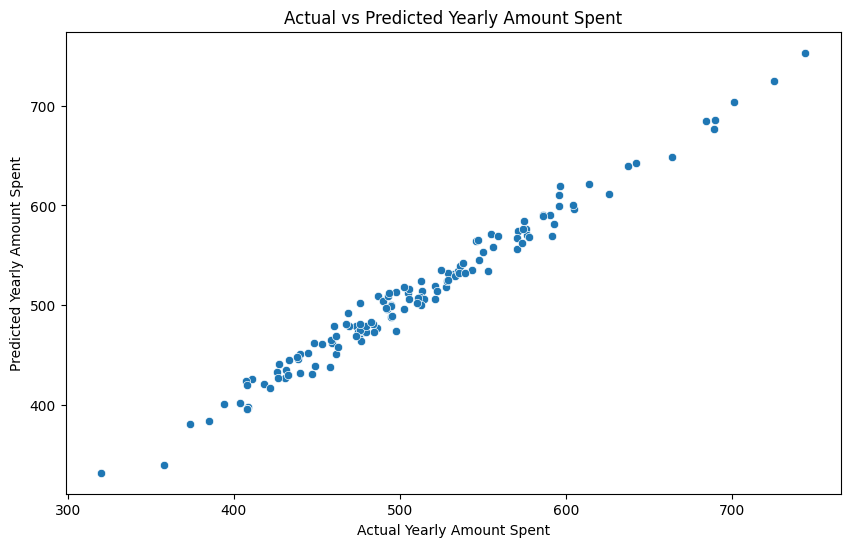

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PySpark DataFrame to Pandas DataFrame for plotting
predictions_pd = prediction.predictions.select("Yearly Amount Spent", "prediction").toPandas()

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Yearly Amount Spent', y='prediction', data=predictions_pd)
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("Predicted Yearly Amount Spent")
plt.title("Actual vs Predicted Yearly Amount Spent")
plt.show()

In [20]:
print("Coefficients: ", regressor.coefficients)
print("Intercept: ", regressor.intercept)

Coefficients:  [25.938728066258875,39.025316941191086,0.15594678591919256,61.42015411180693]
Intercept:  -1051.0088316401784
